# Project 1: Bike Sharing Predication of bike rental count hourly or daily based on the environmental and seasonal settings.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
bike_day = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/bike_day.csv')

In [3]:
bike_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Target is to count the bike i.e..,"cnt"

In [6]:
bike_day.shape

(731, 16)

In [7]:
bike_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike_day['dteday'] = pd.to_datetime(bike_day.dteday)

In [9]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
bike_day.rename(columns={'dteday':'datetime','yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)

In [12]:
bike_day.head()

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## EDA

In [13]:
# bike count values in weather condition

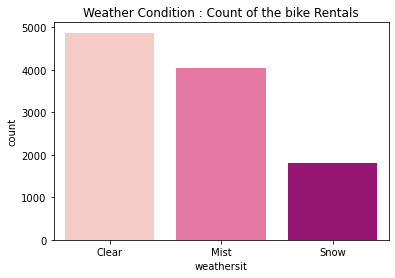

In [14]:
ax = sb.barplot(x = 'weathersit', y = 'count', data = bike_day, palette ='RdPu', ci= None )
ax.set_title('Weather Condition : Count of the bike Rentals')
ax.set_xticklabels(['Clear','Mist','Snow'])
plt.show()

In [15]:
# Season wise weekdays bike count

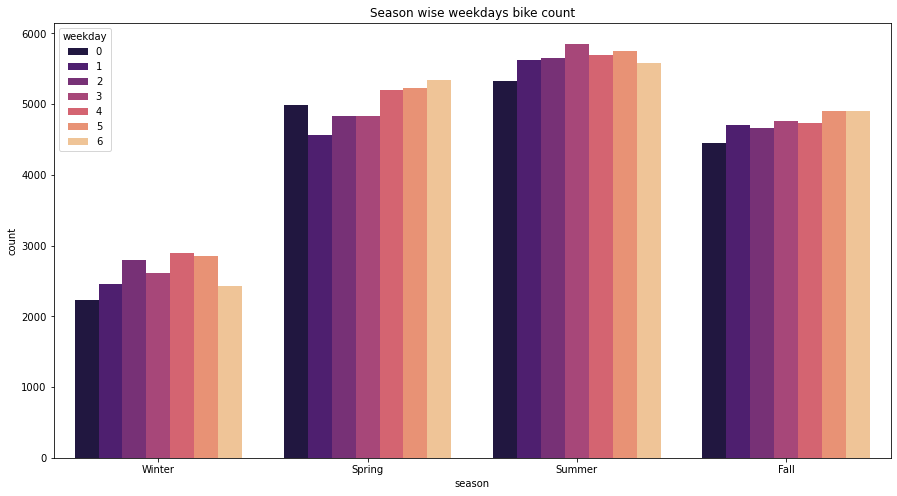

In [16]:
plt.figure(figsize =(15,8))
ax = sb.barplot(x = 'season', y = 'count', data = bike_day,hue='weekday', palette ='magma', ci= None )
ax.set_title('Season wise weekdays bike count')
ax.set_xticklabels(['Winter','Spring','Summer','Fall'])
plt.show()

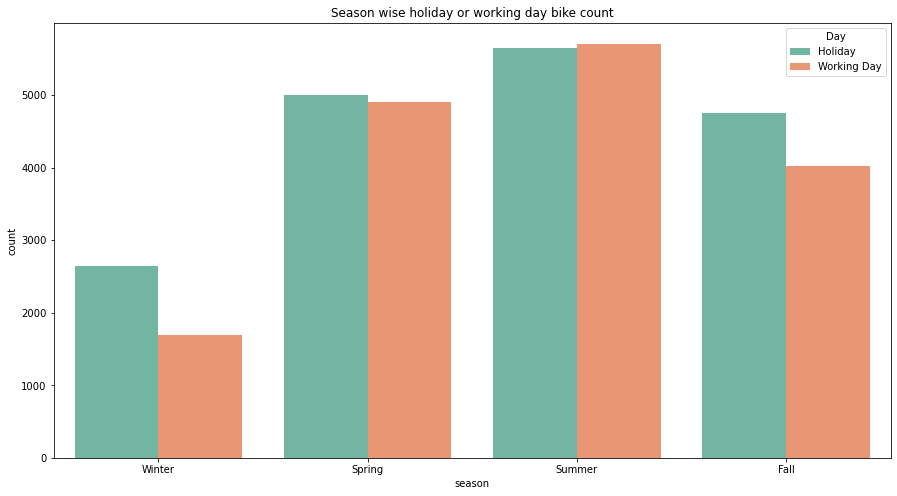

In [17]:
plt.figure(figsize =(15,8))
ax = sb.barplot(x = 'season', y = 'count', data = bike_day,hue='holiday', palette ='Set2', ci= None )
ax.set_title('Season wise holiday or working day bike count')
ax.set_xticklabels(['Winter','Spring','Summer','Fall'])
ax.legend(title ='Day', labels =['Holiday','Working Day'])
plt.show()

In [18]:
# Consistenty of Bike Demand Count on weekdays by Monthly basis

Text(0.5, 1.0, 'Bike Demand Count on weekdays by Monthly basis')

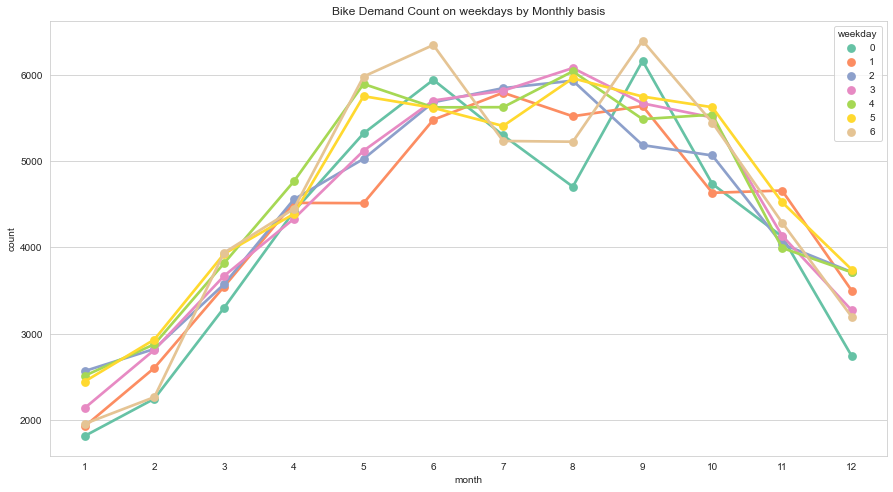

In [19]:
sb.set_style('whitegrid')
plt.figure(figsize =(15,8))
ax = sb.pointplot(x = 'month', y = 'count', data = bike_day,hue='weekday', palette ='Set2', ci= None )
ax.set_title('Bike Demand Count on weekdays by Monthly basis')

C:\Users\talkt\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


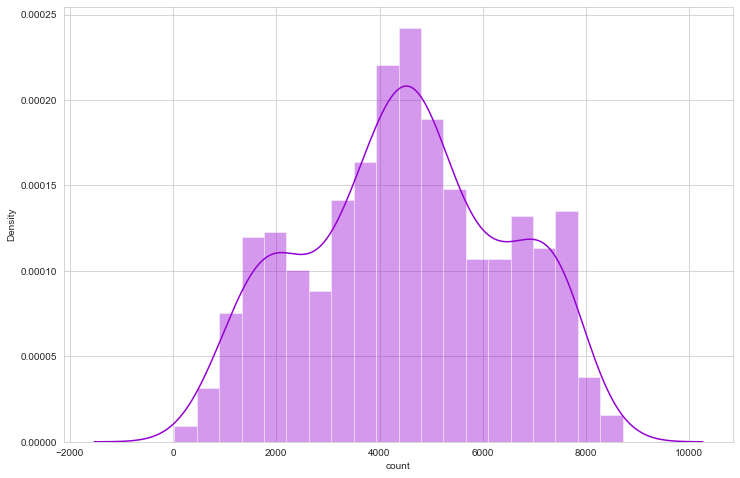

In [20]:
plt.figure(figsize=(12,8))
sb.distplot(bike_day['count'],bins = 20, color = 'darkviolet')
plt.show()

<AxesSubplot:>

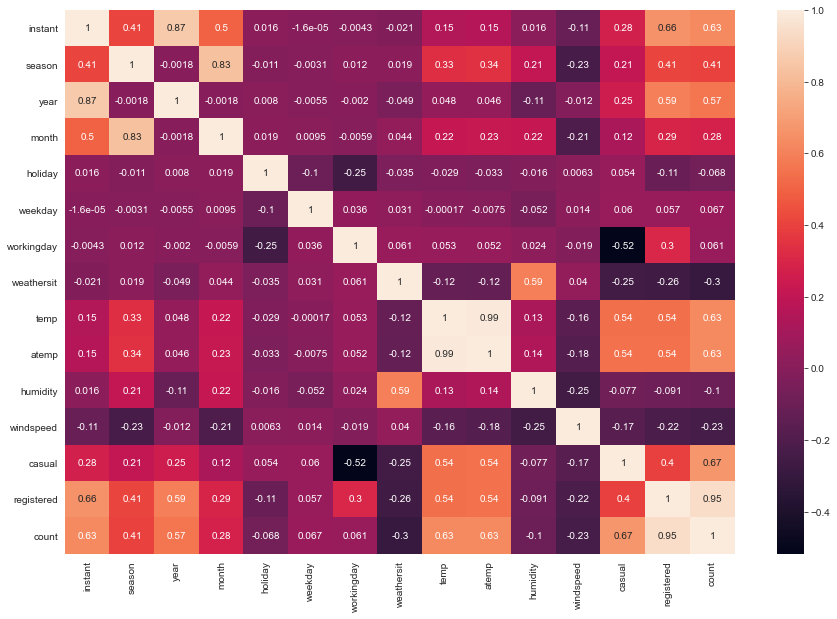

In [21]:
plt.figure(figsize=(15,10))
sb.heatmap(bike_day.corr(), annot = True)

In [22]:
# threshold range to avoid multicolinearity - 0.85 

## Data Preprocessing  

### Handling Outliers

In [23]:
# finding outliers
wind_humidity = pd.DataFrame(bike_day, columns = ['windspeed','humidity'])

for i in ['windspeed','humidity']:
            q75, q25 = np.percentile(wind_humidity.loc[:,i],[75,25])
            IQR = q75 - q25
            max = q75 + (IQR*1.5)
            min = q25 - (IQR*1.5)
            wind_humidity.loc[wind_humidity.loc[:,i] < min, :i] = np.nan
            wind_humidity.loc[wind_humidity.loc[:,i] > max, :i] = np.nan

In [24]:
wind_humidity.loc[:,:]

,windspeed,humidity
0,0.160446,0.805833
1,0.248539,0.696087
2,0.248309,0.437273
3,0.160296,0.590435
4,0.186900,0.436957
...,...,...
726,0.350133,0.652917
727,0.155471,0.590000
728,0.124383,0.752917
729,0.350754,0.483333


In [25]:
wind_humidity.dropna().shape

(717, 2)

In [27]:
# Calculating Outlier Indexes 
index = []
outlier = pd.DataFrame()

for i in range(wind_humidity.shape[0]):
    if wind_humidity.loc[i,].isna().any():
        outlier.loc[i,'outlier'] = 1
        index.append(i)
        
    else:
        outlier.loc[i,'outlier'] = 0
        
wind_humidity['outlier'] = outlier['outlier'].astype(int)
wind_humidity.loc[index]
    

,windspeed,humidity,outlier
44,NaN,0.375833,1
49,NaN,NaN,1
68,NaN,NaN,1
93,NaN,0.426250,1
94,NaN,0.642083,1
292,NaN,0.636250,1
382,NaN,0.443333,1
407,NaN,0.464583,1
420,NaN,0.395833,1
432,NaN,0.567500,1


In [28]:
bike_day['outlier'] = wind_humidity['outlier']   # add outlier feature in bike data

# dropping all the outlier present in dataframe
bike_day.drop(bike_day[(bike_day.outlier ==1)].index, inplace = True)  # dropping all the outlier 


In [29]:
bike_day.shape

(717, 17)

In [30]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     717 non-null    int64         
 1   datetime    717 non-null    datetime64[ns]
 2   season      717 non-null    int64         
 3   year        717 non-null    int64         
 4   month       717 non-null    int64         
 5   holiday     717 non-null    int64         
 6   weekday     717 non-null    int64         
 7   workingday  717 non-null    int64         
 8   weathersit  717 non-null    int64         
 9   temp        717 non-null    float64       
 10  atemp       717 non-null    float64       
 11  humidity    717 non-null    float64       
 12  windspeed   717 non-null    float64       
 13  casual      717 non-null    int64         
 14  registered  717 non-null    int64         
 15  count       717 non-null    int64         
 16  outlier     717 non-null  

In [31]:
bike_day.columns

Index(['instant', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'outlier'],
      dtype='object')

In [32]:
bike_day

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,outlier
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,0


In [43]:
Month= pd.get_dummies(bike_day['month'], prefix = 'month')
Wether_condition = pd.get_dummies(bike_day['weathersit'], prefix = 'wether')
Season_condition = pd.get_dummies(bike_day['season'], prefix = 'season')
Weekday = pd.get_dummies(bike_day['weekday'], prefix = 'weekday')

In [45]:
bike_df = pd.concat([bike_day, Month,Wether_condition,Season_condition, Weekday], axis = 1)


In [46]:
bike_df.columns

Index(['instant', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'outlier', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'wether_1', 'wether_2',
       'wether_3', 'season_1', 'season_2', 'season_3', 'season_4', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [47]:
bike_df.drop(['instant', 'datetime', 'season', 'year', 'month', 'weekday','outlier','registered','atemp','weathersit'], axis = 1, inplace = True)
# axis = 1, columnwise operation

In [48]:
bike_df

,holiday,workingday,temp,humidity,windspeed,casual,count,month_1,month_2,month_3,...,season_2,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.344167,0.805833,0.160446,331,985,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.363478,0.696087,0.248539,131,801,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0.196364,0.437273,0.248309,120,1349,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0.200000,0.590435,0.160296,108,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0.226957,0.436957,0.186900,82,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,1,0.254167,0.652917,0.350133,247,2114,0,0,0,...,0,0,0,0,0,0,0,1,0,0
727,0,1,0.253333,0.590000,0.155471,644,3095,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,0,0,0.253333,0.752917,0.124383,159,1341,0,0,0,...,0,0,0,0,0,0,0,0,0,1
729,0,0,0.255833,0.483333,0.350754,364,1796,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
bike_df.isnull().sum()

holiday       0
workingday    0
temp          0
humidity      0
windspeed     0
casual        0
count         0
month_1       0
month_2       0
month_3       0
month_4       0
month_5       0
month_6       0
month_7       0
month_8       0
month_9       0
month_10      0
month_11      0
month_12      0
wether_1      0
wether_2      0
wether_3      0
season_1      0
season_2      0
season_3      0
season_4      0
weekday_0     0
weekday_1     0
weekday_2     0
weekday_3     0
weekday_4     0
weekday_5     0
weekday_6     0
dtype: int64

# Thank-You 